In this notebook the Fire index is begin forecasted with (for now) a simulation with 51 test on the 5th of november. We can change the CSV file on latitude and longitude by using an R-file made by Else van den Besselaar.

In [1]:
import pandas as pd
from FireWeatherIndex import FWICLASS
import matplotlib.pyplot as plt

Below the forecast data is put in, where from the forecast date the units are changed, such that they fit in the Fire Weather Index. in order:


$1\,kts = 1,852 \,km/h$ \\\
$1\, mm/h = 24 mm/d$ \\\
and putting relative humidity in percentages.







In [2]:
df=pd.read_csv('Guido-data/forecast_data_init_20241105T12_1-15days_debilt.txt')



df['FG(km/h)']=df['FG(kts)'].apply(lambda x: x*1.852)
df['RRrate[mm.d-1]']=df['RRrate[mm.h-1]'].apply(lambda x: x*24)
df['RRrate[HU]']=df['HU(-)'].apply(lambda x: x*100)
df = df.drop(columns=['FG(kts)', 'HU(-)','RRrate[mm.h-1]'])
print(df)

        initdate      fcdates  nrdays  member      TG(C)   FG(km/h)  \
0    20241105T12  20241106T12       1       0  12.538971   2.924328   
1    20241105T12  20241106T12       1       1  11.806061   1.390790   
2    20241105T12  20241106T12       1       2  11.685455   3.959545   
3    20241105T12  20241106T12       1       3  11.460846   4.964362   
4    20241105T12  20241106T12       1       4  12.306549   3.229337   
..           ...          ...     ...     ...        ...        ...   
760  20241105T12  20241120T12      15      46   8.296539  18.892221   
761  20241105T12  20241120T12      15      47  10.840729  23.422942   
762  20241105T12  20241120T12      15      48  10.104156  25.595943   
763  20241105T12  20241120T12      15      49  13.199615  15.435283   
764  20241105T12  20241120T12      15      50  10.365143  25.714395   

     RRrate[mm.d-1]  RRrate[HU]  
0          0.294587   76.806980  
1          0.026634   83.928961  
2          0.034761   85.577089  
3          

Here we find the number of simulations that are in the database.

In [3]:
nmember=len(df['member'].unique())

In this file we find the Fire Index Values for the 5th of november 2024(43407) on station 260(De Bilt), if you want the last day put in -1, if you want another day find df_history and calculate how many days we have from the 5th of november.

In [4]:
df_history=pd.read_csv('Guido-data/Index files/FWI_260.txt')

print(df_history)
startvalues=pd.DataFrame()

startvalues[0] = df_history.iloc[43407][1:7]

print(startvalues)




           date       FFMC        ISI          DC       DMC       BUI  \
0      19060102  84.220644  12.278793   15.000000  6.014404  6.013288   
1      19060103  82.425889   6.071271   15.532000  6.175801  6.194245   
2      19060104  44.627377   0.286477   13.175577  3.612604  4.286752   
3      19060105  18.412167   0.000257    1.324000  1.257584  0.882536   
4      19060106  34.465255   0.076108    1.666000  1.000000  0.815724   
...         ...        ...        ...         ...       ...       ...   
43403  20241101  45.375846   0.132245  200.962223  1.454636  2.857561   
43404  20241102  55.746225   0.436468  203.006223  1.697655  3.325780   
43405  20241103  60.564315   0.517339  205.122223  1.870672  3.657944   
43406  20241104  66.357422   0.889677  207.292223  2.086512  4.070592   
43407  20241105  68.554471   0.756394  209.102223  2.222274  4.329516   

            FWI  
0      9.717494  
1      5.166888  
2      0.115513  
3      0.000066  
4      0.019262  
...         ...

Here we calculate the values of one forecast of the indices of 15 days. We start with creating the dataframe for 1 member en the start values, which will always be the same. We also find the months of the days of the dataframe, which are needed to calculate the dc and dmc(and thus also the bui and fwi in the end) 

In the end one of the forecasts is printed.

In [5]:


def calculate_prediction(start,dataframe,member):
    df=dataframe[dataframe['member']==member]
    prediction=start
    month=df['fcdates'].apply(lambda x: x[4:6])
    for i in range(0,15):
        value=FWICLASS(float(df.iloc[i,4]),float(df.iloc[i,7]),float(df.iloc[i,5]),float(df.iloc[i,6]))
        ffmc=value.FFMCcalc(prediction.iloc[0,i])
        isi=value.ISIcalc(ffmc)
        dc=value.DCcalc(prediction.iloc[2,i], int(month.iloc[i]))
        dmc=value.DMCcalc(prediction.iloc[3,i], int(month.iloc[i]))
        bui=value.BUIcalc(dmc,dc)
        fwi=value.FWIcalc(isi,bui)
        prediction[i+1]=[ffmc,isi,dc,dmc,bui,fwi]
    return prediction
    





    
print(calculate_prediction(startvalues,df,0))

              0           1           2           3           4           5   \
FFMC   68.554471   73.663152   75.927148   77.879863   78.511906   78.557471   
ISI     0.756394    0.830176    1.359847    1.812486    1.505806    1.567201   
DC    209.102223  211.063238  212.340376  213.623315  215.422962  217.231311   
DMC     2.222274    2.641663    2.863858    3.128186    3.398616    3.607989   
BUI     4.329516    5.123026    5.540889    6.035423    6.539313    6.928298   
FWI     0.306232    0.360908    0.612080    0.848279    0.731796    0.783081   

              6           7           8           9           10          11  \
FFMC   79.135133   80.612980   80.711887   81.155455   81.445703   81.492236   
ISI     1.295831    2.916586    2.778800    3.349343    2.914440    2.477783   
DC    219.083561  220.886636  222.398091  223.531747  224.396502  225.197536   
DMC     3.919625    4.345811    4.673793    4.998110    5.290461    5.542868   
BUI     7.503632    8.284157    8.88099

Below we define what a full forecast looks like for one of the indices, which has to be put in index. It returns a dataframe for that index. Here as an example I used FFMC.

In [6]:
def forecast(index):
    df_forecast=pd.DataFrame()
    for i in range(0,nmember):
        df_forecast[str(i)]=calculate_prediction(startvalues,df,i).loc[index]
    return(df_forecast)

print(forecast("FFMC"))

            0          1          2          3          4          5  \
0   68.554471  68.554471  68.554471  68.554471  68.554471  68.554471   
1   73.663152  71.620788  71.830730  71.104952  72.587978  73.802854   
2   75.927148  74.220776  75.285322  73.632183  75.507431  75.387410   
3   77.879863  76.797128  77.207352  76.095251  77.136277  77.160020   
4   78.511906  76.861648  75.748611  77.623701  77.783547  78.343420   
5   78.557471  54.698491  77.124000  77.854853  77.828871  75.570382   
6   79.135133  55.351944  79.036628  77.798854  76.212500  75.614976   
7   80.612980  56.344598  79.592724  81.288905  76.257306  80.267821   
8   80.711887  62.793013  80.523127  81.459981  76.815721  80.313965   
9   81.155455  67.676226  76.139341  80.819771  77.889889  76.963473   
10  81.445703  70.298842  78.079034  80.866098  29.654530  57.445717   
11  81.492236  75.843953  78.935781  70.323070  51.240143  73.947403   
12  80.432120  77.704385  72.061839  76.824003  64.267705  76.29

In [7]:
#The index to make the big plot, options: FFMC, ISI, DC, DMC, BUI and FWI
index="FFMC"

Here we plot a figure with all the different simulations for the index mentioned above. those are the small black lines, mentioned in the second row of the next code. Also we make quantile lines, which for now have been put on 0.1, 0.25, 0.5, 0.75 and 0.9. You can also change the labels of these in the third row of the next code. The fill_between can be used how you like to. I have now put it between 0.25 and 0.75 in the fourth row of the code, but can be changed to what you like yourself.

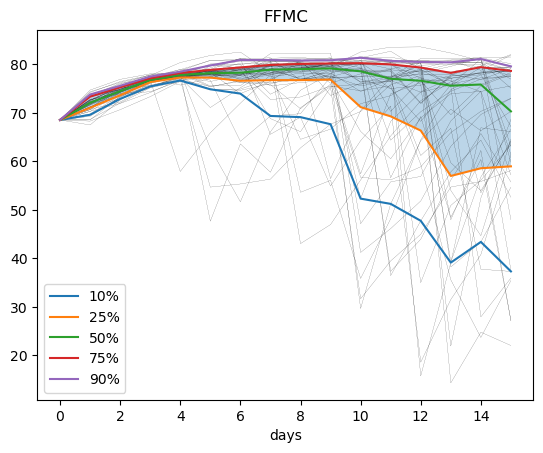

In [8]:
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
plt.plot(forecast(index), color='black', linewidth=0.1) 
plt.plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
plt.legend()
plt.fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
plt.xlabel("days")
plt.title(index)
plt.show()

Here all the possible indices are put in one figure.

Text(0.5, 1.0, 'FWI')

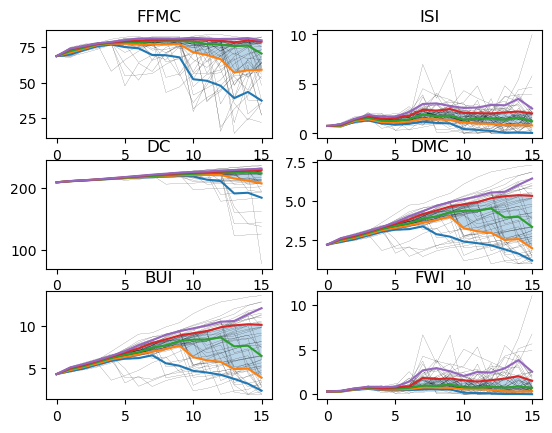

In [9]:
fig, axs=plt.subplots(3,2)
index='FFMC'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9,],axis=1)
axs[0, 0].plot(forecast(index), color='black', linewidth=0.1) 
axs[0, 0].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[0, 0].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[0, 0].set_title(index)
index='ISI'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
axs[0, 1].plot(forecast(index), color='black', linewidth=0.1) 
axs[0, 1].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[0, 1].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[0, 1].set_title(index)
index='DC'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
axs[1, 0].plot(forecast(index), color='black', linewidth=0.1) 
axs[1, 0].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[1, 0].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[1, 0].set_title(index)
index='DMC'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
axs[1, 1].plot(forecast(index), color='black', linewidth=0.1) 
axs[1, 1].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[1, 1].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[1, 1].set_title(index)
index='BUI'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
axs[2, 0].plot(forecast(index), color='black', linewidth=0.1) 
axs[2, 0].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[2, 0].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[2, 0].set_title(index)
index='FWI'
df_forecast_metrics=forecast(index).quantile([0.1,0.25,0.5,0.75,0.9],axis=1)
axs[2, 1].plot(forecast(index), color='black', linewidth=0.1) 
axs[2, 1].plot(df_forecast_metrics.transpose(), label=['10%','25%','50%','75%','90%'])
axs[2, 1].fill_between(df_forecast_metrics.columns, df_forecast_metrics.transpose()[0.25], df_forecast_metrics.transpose()[0.75], alpha=0.3)
axs[2, 1].set_title(index)
